In [8]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from pathlib import Path
from utils import create_directory
from model import test
import plot as plot
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data_dir = create_directory(directory_name='simple0') # loss0_if
modular = 0

/Users/mahdiyar/miniconda3/envs/dl/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mahdiyar/miniconda3/envs/dl/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/mahdiyar/miniconda3/envs/dl/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


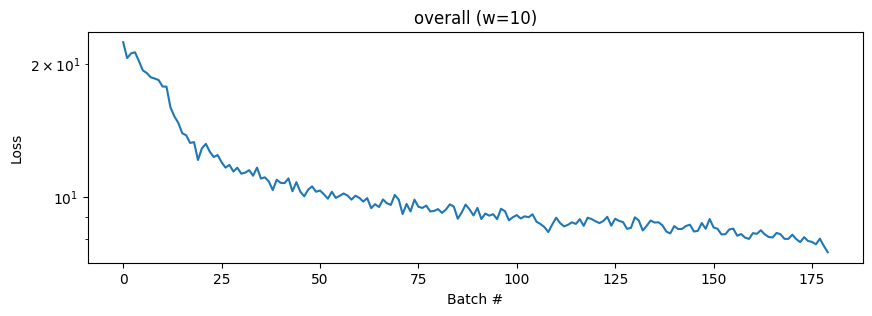

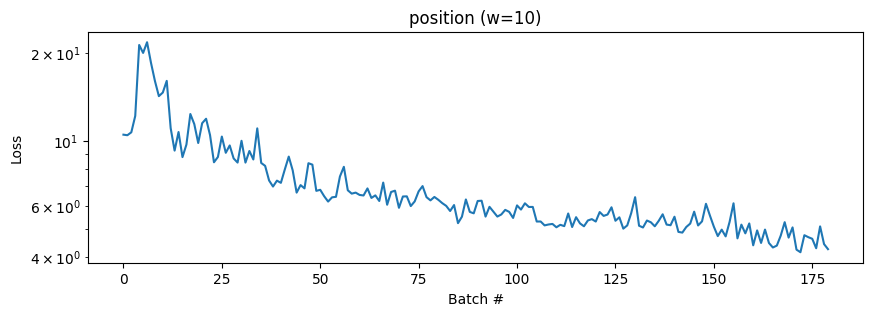

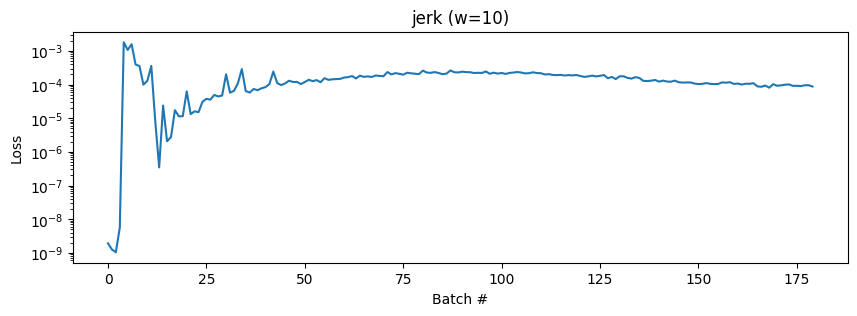

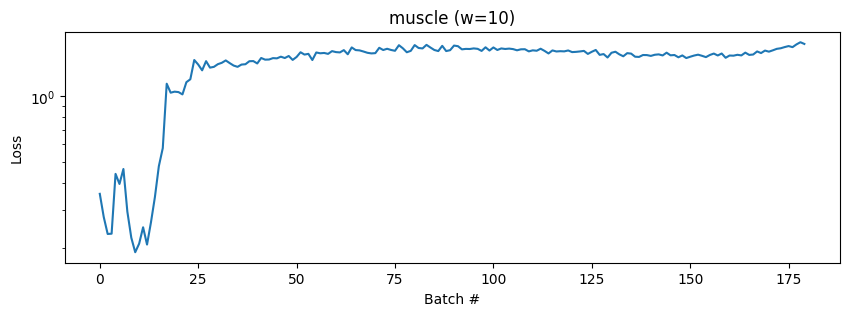

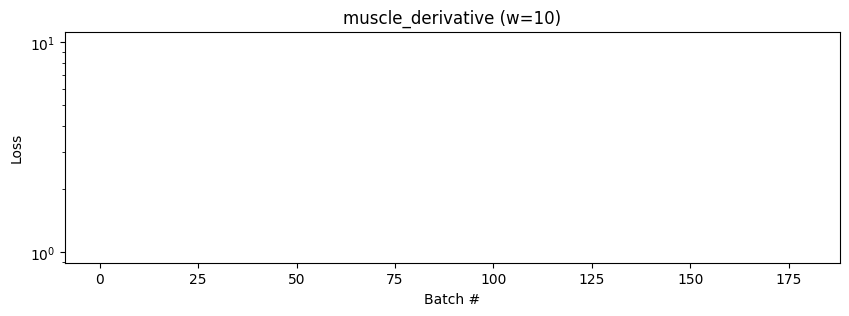

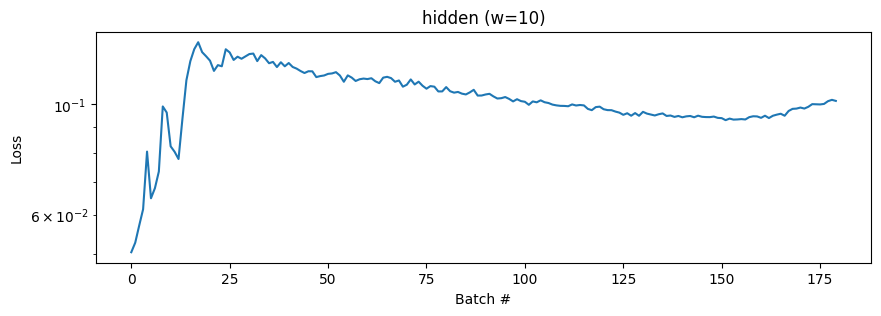

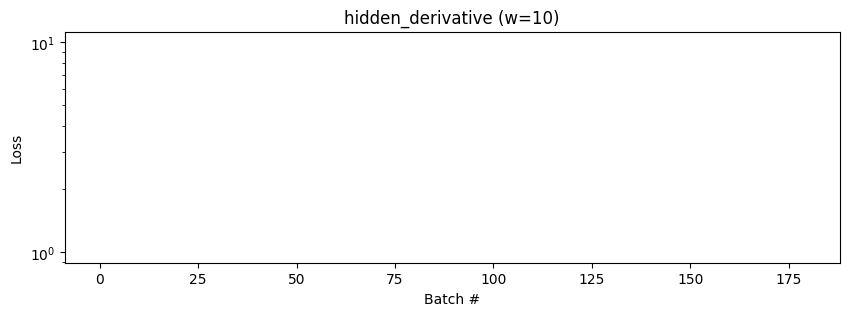

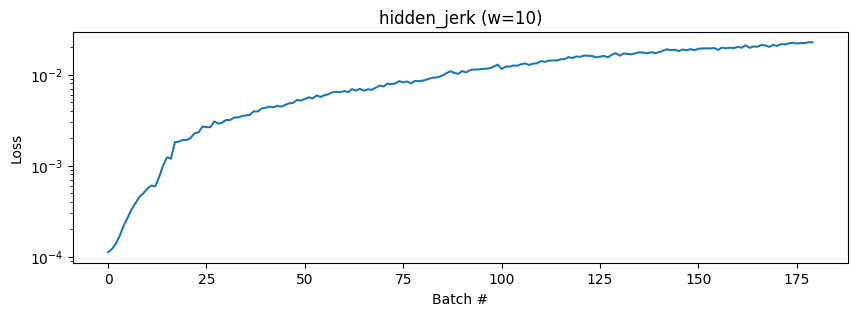

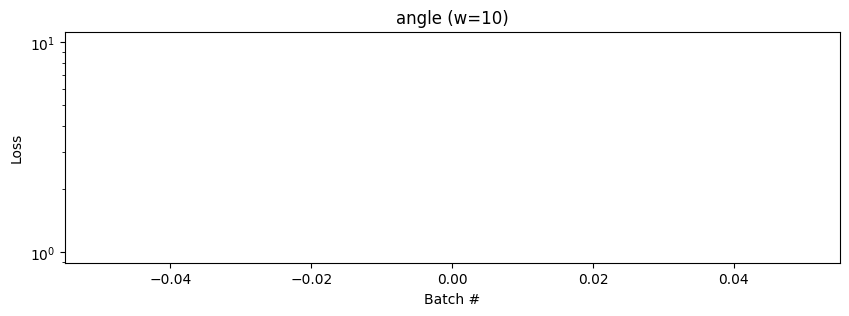

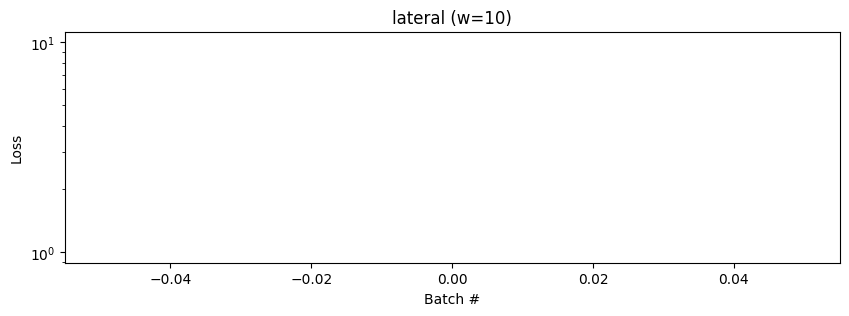

In [10]:
model_num = 0
model_name = "model{:02d}".format(model_num)

phase = 'growing_up'
log_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_log.json'))[0]
log = json.load(open(log_file,'r'))
w=10
for loss in log.keys():
    fig,ax = plot.plot_training_log(log=log,loss_type=loss, w=w)
    ax.set_title(f"{loss} (w={w})")
#fig.savefig(os.path.join(data_dir,'loss_FF1.png'),dpi=300)

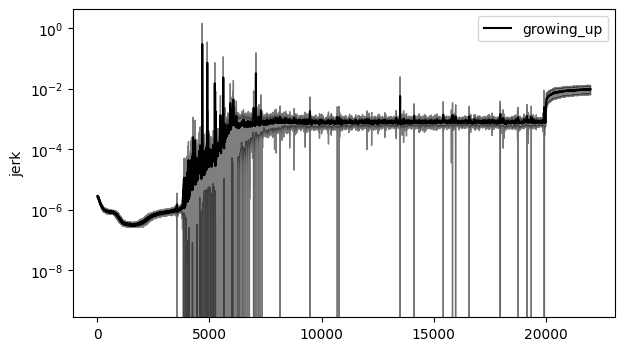

In [50]:
fig, ax = plot.plot_learning(data_dir,num_model=16,w=1,phases=['growing_up'],loss_type='jerk',figsize=(7,4),ignore=[])
#ax[0].set_xlim([2000,10000])
#ax[0].set_ylim([-0.001,0.001])

skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason


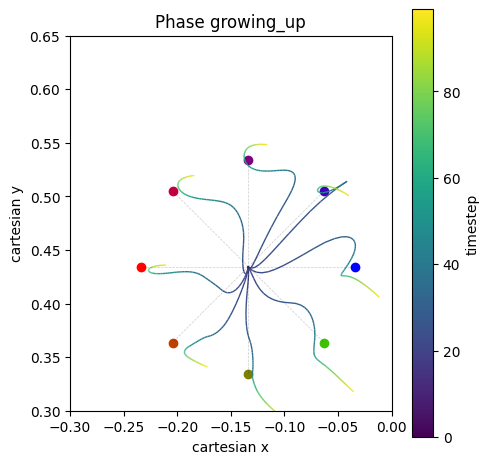

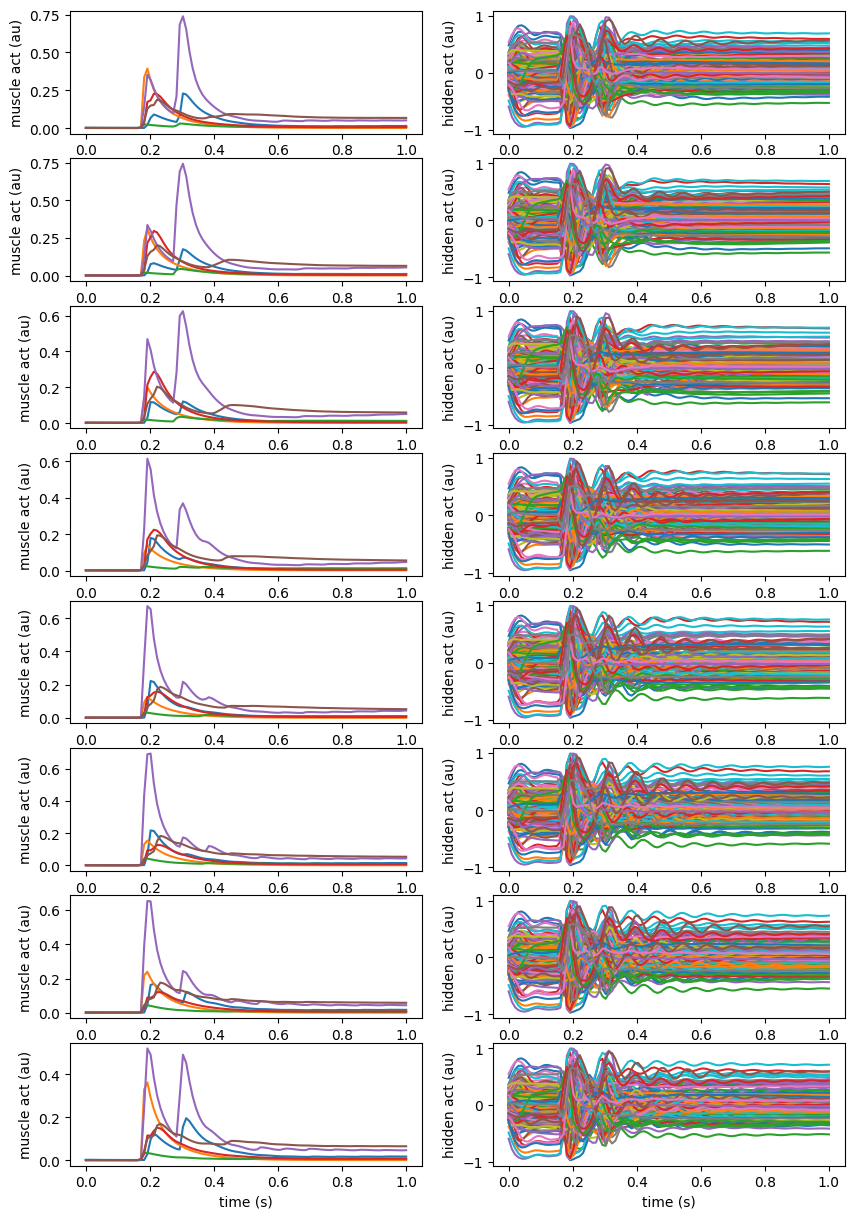

In [11]:
model_num = 0
# pert - input fix [0,11,13]
# loss0 - [2,3,7,13] 
model_name = "model{:02d}".format(model_num)
data = []
#label = ['NF1','FF1']
label = ['growing_up']
ff = [0,8]
is_channel = False
#K = 870
#B = -5
K = 170
B = -1
dT = 0.01

fig,ax = plt.subplots(1,len(label),figsize=(5*len(label),5))
if len(label) == 1:
    ax = [ax]
for i,p in enumerate(label):
    weight_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_weights'))[0]
    cfg_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_cfg.json'))[0]
    data.append(test(cfg_file,weight_file,ff_coefficient=ff[i],is_channel=is_channel,K=K,B=B,dT=dT,calc_endpoint_force=True,modular=modular))
    plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False)
    ax[i].set_title(f'Phase {p}')

plt.tight_layout()
#fig.savefig(os.path.join(data_dir,'input_flex_60000.png'),dpi=300)
plt.show()


fig, ax = plot.plot_activation(data[i]['all_hidden'],data[i]['all_muscle'],figsize=(10,15))
#fig.savefig(os.path.join(data_dir,'activation.png'),dpi=300)

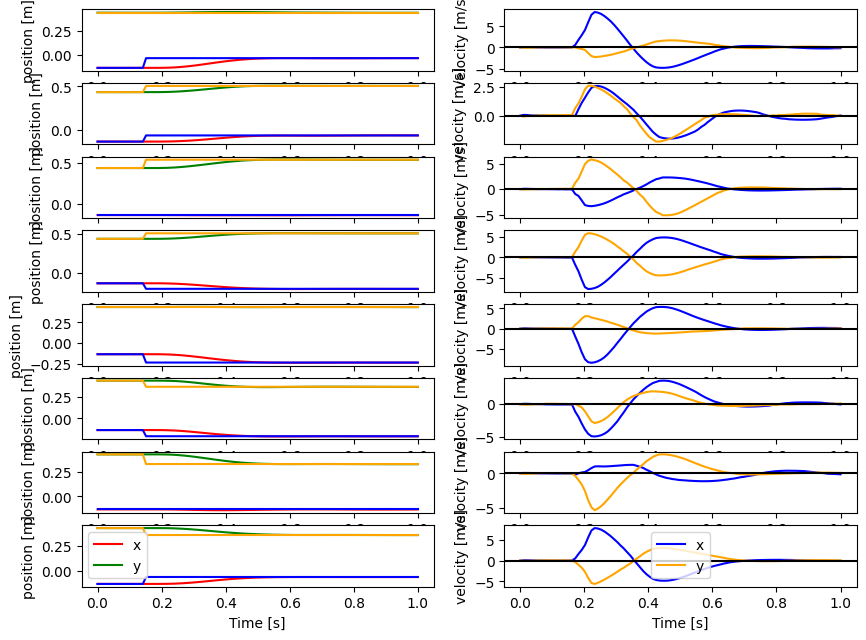

In [5]:
i = 0
fig, ax = plot.plot_kinematic(data[i]['endpoint_force'],data[i]['xy'],data[i]['tg'],figsize=(10,7.5)) # data[i]['vel']
#fig.savefig(os.path.join(data_dir,'kinematic.png'),dpi=300)

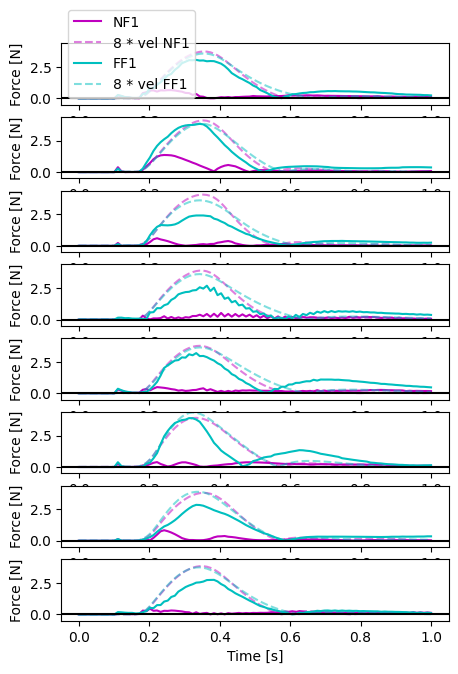

In [28]:
fig, ax = plot.plot_force(data,label,figsize=(5,7.5))
#fig.savefig(os.path.join(data_dir,'lat_force.png'),dpi=300)

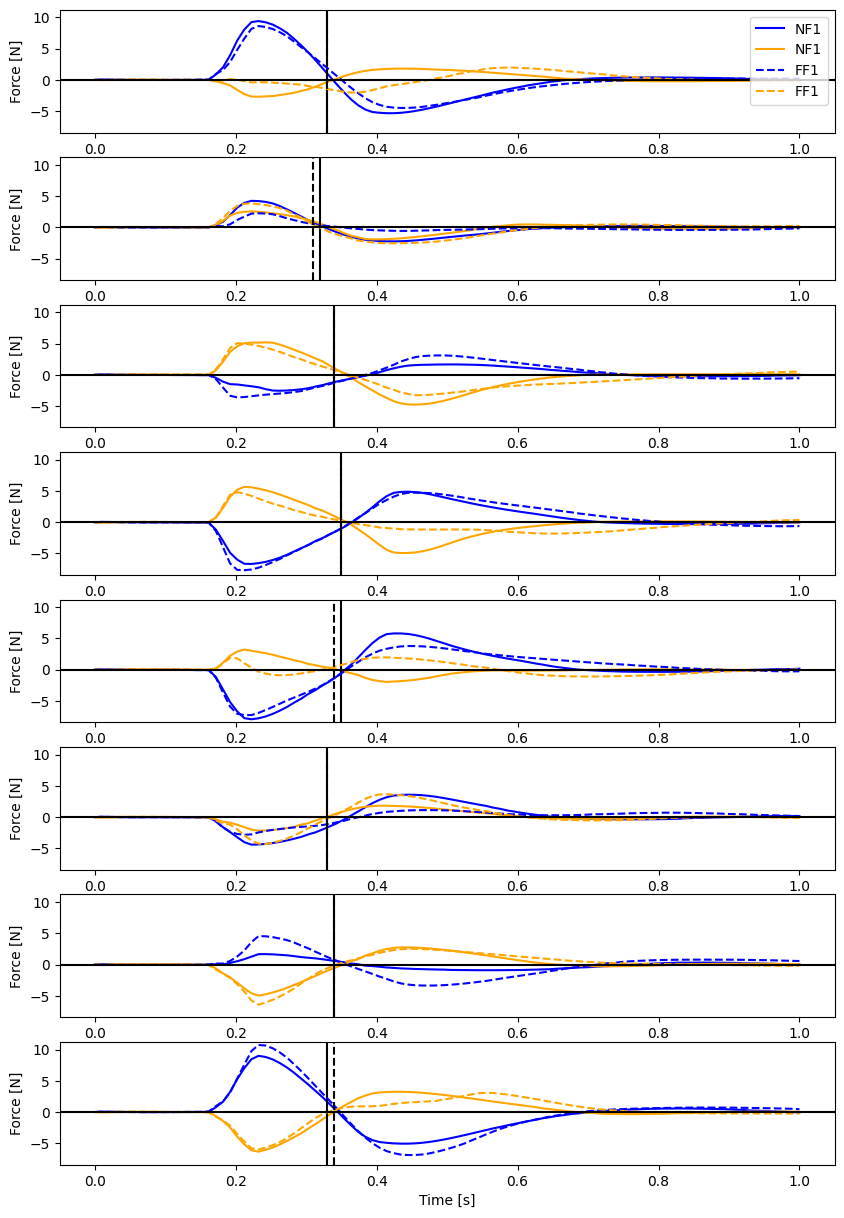

In [6]:
fg, ax = plot.plot_epforce(data,label,figsize=(10,15))